In [1]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots
import scipy.stats as sts
import scikit_posthocs as sp
import statsmodels.stats as stm
from statsmodels.graphics.gofplots import qqplot

In [2]:
df = pd.read_csv("data/Production_Crops_Livestock_E_All_Data.csv", encoding='latin-1')
df2 = df.dropna(how = 'any') # removing all missing data 
df2 = df2[df2["Area Code"]<1000] # removing the summerised Areas (Africa as a hole etc.)
df2 = df2.drop(["Area Code", "Area Code (M49)","Item Code (CPC)" ,"Item Code", "Element Code"], axis=1) # removing not used collums
df2 = df2.drop(df2.columns[df2.columns.str.endswith('F')], axis=1) # removing all collums wich say how the data was collectet. Big loss of information!! 
df2 = pd.melt(df2, id_vars=['Area', "Item", "Element", "Unit"], var_name='Year', value_name='Value') # reshaping the df to create a single year collum 
df2['Year'] = df2['Year'].str[1:] # removin the letter of befor the years
df2['Year'] = df2['Year'].astype(int)
df2 = df2.rename(index=str, columns={"Value": "yield_amound"})

dg = pd.read_csv("data/rain.csv", encoding='latin-1')
dg2=dg.drop(['Stop','Indicator','Code','IndicatorCode'], axis=1) 
dg2 = pd.melt(dg2, id_vars=['ï»¿Area'], var_name='Year', value_name='Value') # reshaping the df to create a single year collum 	
dg2=dg2.dropna()
dg2 = dg2.rename(index=str, columns={"Value": "rain"})
dg2 = dg2.rename(index=str, columns={"ï»¿Area": "Area"})
dg2['Year']=dg2['Year'].astype('int')

dr = pd.read_csv("data/FAOSTAT_data_en_4-18-2023.csv", encoding='latin-1')
dr2 = dr.dropna(how = 'any') # removing all missing data 
dr2 = dr2.drop(["ï»¿Domain Code", "Area Code (M49)", "Item Code", "Element Code", "Year Code", "Flag", "Flag Description"], axis=1) # removing not used collums
dr2 = dr2.rename(index=str, columns={"Value": "pesticide_amound"})

di = pd.read_csv("data/temp.csv", encoding='latin-1')
di2 = di.dropna(how = 'any') # removing all missing data 
di2 = di2.rename(index=str, columns={"year": "Year"}) # renaming collums 
di2 = di2.rename(index=str, columns={"country": "Area"}) #renaming collums 

merged = pd.merge(df2, dr2, on= ["Area", "Year"])
merged = pd.merge(di2, merged, on= ["Area", "Year"])
merged = pd.merge(dg2, merged, on= ["Area", "Year"])

merged=merged[(merged['Unit_x']=='tonnes')]

merged

,Area,Year,rain,avg_temp,Item_x,Element_x,Unit_x,yield_amound,Domain,Element_y,Item_y,Unit_y,pesticide_amound
33,Angola,1990,1010.0,24.12,Bananas,Production,tonnes,270000.00,Pesticides Use,Agricultural Use,Pesticides (total),tonnes,64.0
34,Angola,1990,1010.0,24.12,Bananas,Production,tonnes,270000.00,Pesticides Use,Agricultural Use,Insecticides,tonnes,56.0
35,Angola,1990,1010.0,24.12,Bananas,Production,tonnes,270000.00,Pesticides Use,Agricultural Use,Insecticides â Chlorinated Hydrocarbons,tonnes,30.0
36,Angola,1990,1010.0,24.12,Bananas,Production,tonnes,270000.00,Pesticides Use,Agricultural Use,Insecticides â Organo-phosphates,tonnes,17.0
37,Angola,1990,1010.0,24.12,Bananas,Production,tonnes,270000.00,Pesticides Use,Agricultural Use,Insecticides â Carbamates,tonnes,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15909234,Zimbabwe,2013,657.0,19.76,Vegetables Primary,Production,tonnes,220462.21,Pesticides Use,Agricultural Use,Insecticides â Seed Treatments,tonnes,0.0
15909235,Zimbabwe,2013,657.0,19.76,Vegetables Primary,Production,tonnes,220462.21,Pesticides Use,Agricultural Use,Plant Growth Regulators,tonnes,177.7
15909236,Zimbabwe,2013,657.0,19.76,Vegetables Primary,Production,tonnes,220462.21,Pesticides Use,Agricultural Use,Rodenticides,tonnes,0.0
15909237,Zimbabwe,2013,657.0,19.76,Vegetables Primary,Production,tonnes,220462.21,Pesticides Use,Agricultural Use,Rodenticides â Anti-coagulants,tonnes,0.0


In [25]:
print('Country',len(merged['Area'].unique()),merged['Area'].unique())

Europe =['Albania','Austria','Bulgaria','Switzerland','Germany','Denmark','Hungary','Spain','Finland','France', 'Greece', 'Ireland','Italy','Netherlands','Norway','Poland','Portugal','Sweden','Romania']
Afrique =['Angola','Burundi','Burkina Faso','Botswana','Central African Republic','Cameroon','Congo','Algeria','Egypt','Ghana','Guinea','Kenya', 'Libya','Lesotho','Morocco','Madagascar','Mali','Mozambique','Mauritania','Mauritius','Malawi','Namibia','Niger','Rwanda','Senegal','Tunisia','Uganda','South Africa','Zambia','Zimbabwe']
Amerique =['Argentina','Bahamas','Brazil','Canada','Chile','Colombia','Dominican Republic','Ecuador','Guatemala','Guyana','Honduras','Haiti','Jamaica','Mexico','Nicaragua','Peru','El Salvador','Uruguay' ]
Asie =['Bangladesh','Bahrain','China','Indonesia' 'India','Iraq','Japan','Lebanon','Sri Lanka','Mongolia','Malaysia','Nepal','Pakistan', 'Philippines','Qatar','Saudi Arabia','Suriname','Thailand']
Oceanie=['Australia','New Zealand','Papua New Guinea']

Country 88 ['Angola' 'Albania' 'Argentina' 'Australia' 'Austria' 'Burundi'
 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain' 'Bahamas' 'Brazil'
 'Botswana' 'Central African Republic' 'Canada' 'Switzerland' 'Chile'
 'China' 'Cameroon' 'Congo' 'Colombia' 'Germany' 'Denmark'
 'Dominican Republic' 'Algeria' 'Ecuador' 'Egypt' 'Spain' 'Finland'
 'France' 'Ghana' 'Guinea' 'Greece' 'Guatemala' 'Guyana' 'Honduras'
 'Haiti' 'Hungary' 'Indonesia' 'India' 'Ireland' 'Iraq' 'Italy' 'Jamaica'
 'Japan' 'Kenya' 'Lebanon' 'Libya' 'Sri Lanka' 'Lesotho' 'Morocco'
 'Madagascar' 'Mexico' 'Mali' 'Mongolia' 'Mozambique' 'Mauritania'
 'Mauritius' 'Malawi' 'Malaysia' 'Namibia' 'Niger' 'Nicaragua'
 'Netherlands' 'Norway' 'Nepal' 'New Zealand' 'Pakistan' 'Peru'
 'Philippines' 'Papua New Guinea' 'Poland' 'Portugal' 'Qatar' 'Romania'
 'Rwanda' 'Saudi Arabia' 'Senegal' 'El Salvador' 'Suriname' 'Sweden'
 'Thailand' 'Tunisia' 'Uganda' 'Uruguay' 'South Africa' 'Zambia'
 'Zimbabwe']


In [3]:
#grouping by region 
df_Europe = merged[(merged['Area']=='Albania')| (merged['Area']=='Austria')| (merged['Area']=='Bulgaria')| (merged['Area']=='Switzerland')| (merged['Area']=='Germany')| (merged['Area']=='Denmark')| (merged['Area']=='Hungary')| (merged['Area']=='Spain')| (merged['Area']=='Finland')| (merged['Area']=='France')| (merged['Area']=='Greece')| (merged['Area']=='Ireland')| (merged['Area']=='Italy')| (merged['Area']=='Netherlands')| (merged['Area']=='Norway')| (merged['Area']=='Portugal')| (merged['Area']=='Sweden')| (merged['Area']=='Romania')]
df_Africa= merged[(merged['Area']=='Angola')| (merged['Area']=='Burundi')| (merged['Area']=='Burkina Faso')| (merged['Area']=='Botswana')| (merged['Area']=='Central African Republic')| (merged['Area']=='Cameroon')| (merged['Area']=='Congo')| (merged['Area']=='Algeria')| (merged['Area']=='Egypt')| (merged['Area']=='Ghana')| (merged['Area']=='Guinea')| (merged['Area']=='Kenya')| (merged['Area']== 'Libya')| (merged['Area']=='Lesotho')| (merged['Area']=='Morocco')| (merged['Area']=='Madagascar')| (merged['Area']=='Mali')| (merged['Area']=='Mozambique')| (merged['Area']=='Mauritania')| (merged['Area']=='Mauritius')| (merged['Area']=='Malawi')| (merged['Area']=='Namibia')| (merged['Area']=='Niger')| (merged['Area']=='Rwanda')| (merged['Area']=='Senegal')| (merged['Area']=='Tunisia')| (merged['Area']=='Uganda')| (merged['Area']=='South Africa')| (merged['Area']=='Zambia')| (merged['Area']=='Zimbabwe')]
df_America =merged[(merged['Area']=='Argentina')| (merged['Area']=='Bahamas')| (merged['Area']=='Brazil')| (merged['Area']=='Canada')| (merged['Area']=='Chile')| (merged['Area']=='Colombia')| (merged['Area']=='Dominican Republic')| (merged['Area']=='Ecuador')| (merged['Area']=='Guatemala')| (merged['Area']=='Guyana')| (merged['Area']=='Honduras')| (merged['Area']=='Haiti')| (merged['Area']=='Jamaica')| (merged['Area']=='Mexico')| (merged['Area']=='Nicaragua')| (merged['Area']=='Peru')| (merged['Area']=='El Salvador')| (merged['Area']=='Uruguay' )]
df_Asie = merged[(merged['Area']=='Bangladesh')| (merged['Area']=='Bahrain')| (merged['Area']=='China')| (merged['Area']=='Indonesia')| (merged['Area']== 'India')| (merged['Area']=='Iraq')| (merged['Area']=='Japan')| (merged['Area']=='Lebanon')| (merged['Area']=='Sri Lanka')| (merged['Area']=='Mongolia')| (merged['Area']=='Malaysia')| (merged['Area']=='Nepal')| (merged['Area']=='Pakistan')| (merged['Area']== 'Philippines')| (merged['Area']=='Qatar')| (merged['Area']=='Saudi Arabia')| (merged['Area']=='Suriname')| (merged['Area']=='Thailand')]
df_Oceanie= merged[(merged['Area']=='Australia')| (merged['Area']=='New Zealand')| (merged['Area']=='Papua New Guinea')]


### Short statistics and data visualisation  

Text(0.5, 1.0, 'Oceania')

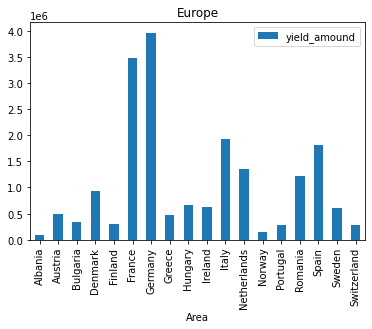

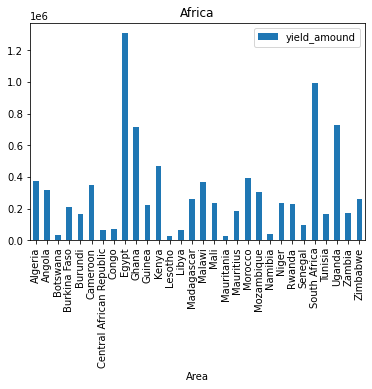

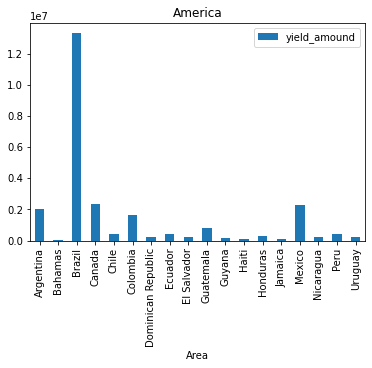

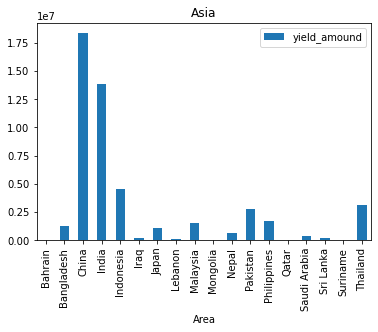

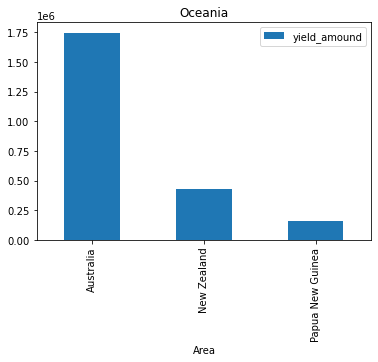

In [4]:

A=df_Europe.groupby("Area")[["yield_amound"]].mean()
A.plot(kind='bar').set_title("Europe")

B=df_Africa.groupby("Area")[["yield_amound"]].mean()
B.plot(kind='bar').set_title("Africa")

C=df_America.groupby("Area")[["yield_amound"]].mean()
C.plot(kind='bar').set_title("America")

D=df_Asie.groupby("Area")[["yield_amound"]].mean()
D.plot(kind='bar').set_title("Asia")


E=df_Oceanie.groupby("Area")[["yield_amound"]].mean()
E.plot(kind='bar').set_title("Oceania")



In [5]:
data=merged[(merged['Area']=='Australia')| (merged['Area']=='china')| (merged['Area']=='Brazil')]

In [ ]:
sns.pairplot(df_Europe, hue='Area');

### PCA

I think that to start with you have to analyse the different components and for that you can use a PCA

In [ ]:
print('Item_x',len(merged['Item_x'].unique()),merged['Item_x'].unique())

In [7]:

data=merged[(merged['Item_x']=='Rice')| (merged['Item_x']=='Wheat')| (merged['Item_x']=='Maize')|(merged['Item_x']=='Fruit Primary')|(merged['Item_x']=='Cattle and Buffaloes')|(merged['Item_x']=='Sugar Crops Primary')]
df = data[[ "avg_temp", "yield_amound","pesticide_amound","rain"]]
df_2= data[[ "Item_x", "avg_temp", "yield_amound","pesticide_amound"]]
df

,avg_temp,yield_amound,pesticide_amound,rain
1045,24.12,3000.0,64.0,1010.0
1046,24.12,3000.0,56.0,1010.0
1047,24.12,3000.0,30.0,1010.0
1048,24.12,3000.0,17.0,1010.0
1049,24.12,3000.0,5.0,1010.0
...,...,...,...,...
15909141,19.76,3960000.0,0.0,657.0
15909142,19.76,3960000.0,177.7,657.0
15909143,19.76,3960000.0,0.0,657.0
15909144,19.76,3960000.0,0.0,657.0


In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
yield_scaled = StandardScaler().fit_transform(df)
# As a result, we obtained a two-dimensional NumPy array. We can convert it to a pandas DataFrame for a better display.
df_scaled = pd.DataFrame(data=yield_scaled, 
                                columns=df.columns)
df_scaled.head()

,avg_temp,yield_amound,pesticide_amound,rain
0,0.710233,-0.639621,-0.333831,-0.169552
1,0.710233,-0.639621,-0.334030,-0.169552
2,0.710233,-0.639621,-0.334677,-0.169552
3,0.710233,-0.639621,-0.335001,-0.169552
4,0.710233,-0.639621,-0.335299,-0.169552


In [9]:
pca = PCA(n_components=2)
PC = pca.fit_transform(df_scaled)

In [10]:
pca_yield = pd.DataFrame(data = PC, 
                            columns = ['PC1', 'PC2'])
pca_yield.head(6)

,PC1,PC2
0,-0.639995,-0.232139
1,-0.640091,-0.232220
2,-0.640403,-0.232485
3,-0.640559,-0.232618
4,-0.640703,-0.232740
5,-0.640715,-0.232750


Text(0, 0.5, 'PC2')

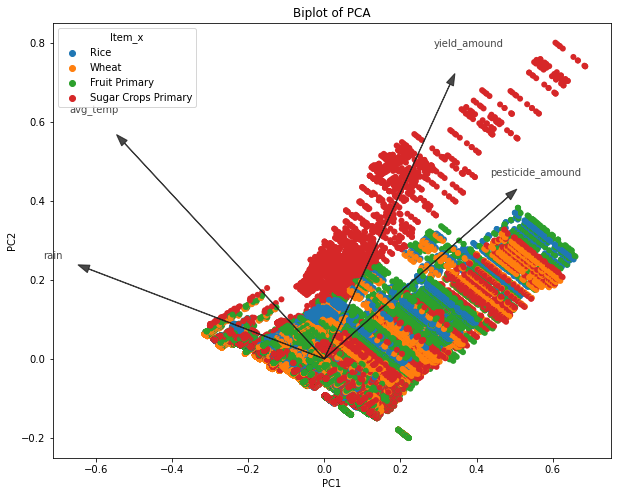

In [11]:
PC1 = pca_yield['PC1']/(pca_yield['PC1'].max() - pca_yield['PC1'].min())
PC2 = pca_yield['PC2']/(pca_yield['PC2'].max() - pca_yield['PC2'].min())

plt.figure(figsize=(10, 8))
plt.title('Biplot of PCA')
sns.scatterplot(x=PC1,
              y=PC2,
              hue = df_2['Item_x'].tolist(),
              linewidth=0,
              )

n = np.transpose(pca.components_).shape[0] # number of dimensions (2)
for i in range(n):
        plt.arrow(0, 0, np.transpose(pca.components_)[i,0], 
                  np.transpose(pca.components_)[i,1], 
                  color = (0.1, 0.1, 0.1, 0.8),
                  head_width=0.02) # plot arrows for each variable
        plt.text(np.transpose(pca.components_)[i,0]* 1.15, 
                 np.transpose(pca.components_)[i,1] * 1.15, 
                 list(df.columns)[i], 
                 color = (0.1, 0.1, 0.1, 0.8), 
                 ha = 'center', 
                 va = 'center') # variable labels for each arrow
plt.legend(title='Item_x')
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))

cliamtic condition 

In [12]:
data

,Area,Year,rain,avg_temp,Item_x,Element_x,Unit_x,yield_amound,Domain,Element_y,Item_y,Unit_y,pesticide_amound
1045,Angola,1990,1010.0,24.12,Rice,Production,tonnes,3000.0,Pesticides Use,Agricultural Use,Pesticides (total),tonnes,64.0
1046,Angola,1990,1010.0,24.12,Rice,Production,tonnes,3000.0,Pesticides Use,Agricultural Use,Insecticides,tonnes,56.0
1047,Angola,1990,1010.0,24.12,Rice,Production,tonnes,3000.0,Pesticides Use,Agricultural Use,Insecticides â Chlorinated Hydrocarbons,tonnes,30.0
1048,Angola,1990,1010.0,24.12,Rice,Production,tonnes,3000.0,Pesticides Use,Agricultural Use,Insecticides â Organo-phosphates,tonnes,17.0
1049,Angola,1990,1010.0,24.12,Rice,Production,tonnes,3000.0,Pesticides Use,Agricultural Use,Insecticides â Carbamates,tonnes,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15909141,Zimbabwe,2013,657.0,19.76,Sugar Crops Primary,Production,tonnes,3960000.0,Pesticides Use,Agricultural Use,Insecticides â Seed Treatments,tonnes,0.0
15909142,Zimbabwe,2013,657.0,19.76,Sugar Crops Primary,Production,tonnes,3960000.0,Pesticides Use,Agricultural Use,Plant Growth Regulators,tonnes,177.7
15909143,Zimbabwe,2013,657.0,19.76,Sugar Crops Primary,Production,tonnes,3960000.0,Pesticides Use,Agricultural Use,Rodenticides,tonnes,0.0
15909144,Zimbabwe,2013,657.0,19.76,Sugar Crops Primary,Production,tonnes,3960000.0,Pesticides Use,Agricultural Use,Rodenticides â Anti-coagulants,tonnes,0.0


In [42]:
#creates yield classes 
# Binning:
def binning(col, cut_points, labels=None):
    # Définir les valeurs min et max:
    minval = col.min()
    maxval = col.max()

    # Créer une liste en ajoutant min et max à cut_points
    break_points = [minval] + cut_points + [maxval]

    # Si aucun label, on utilise par défaut les labels 0 ... (n-1)
    if not labels:
        labels = range(len(cut_points)+1)

    # Regroupement en utilisant la fonction cut de Pandas
    colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return colBin

cut_points = [300000,1800000,10000000,23000000,41000000,95000000]
labels = ["1","2","3","4","5","6","7"] # 1= low yield 5= very high yield 
data["classe"] = binning(data["yield_amound"], cut_points, labels)
print(pd.value_counts(data["classe"], sort=False))

1    30926
2    36607
3    49938
4    18087
5    16162
6    29744
7    51254
Name: classe, dtype: int64


<ipython-input-42-73d657e78c8b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["classe"] = binning(data["yield_amound"], cut_points, labels)


<AxesSubplot:xlabel='avg_temp', ylabel='rain'>

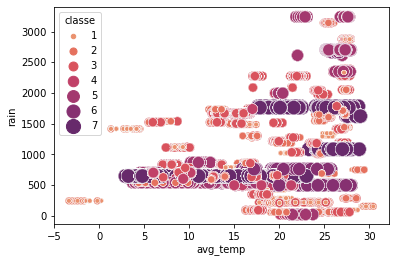

In [43]:

sns.scatterplot(
    data=data, x="avg_temp", y="rain", hue="classe", palette="flare", size="classe",
    sizes=(200, 20), legend="full"
)



<ipython-input-44-b22df1f75dfc>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=data[(data["Area"]=="France")|(data["Area"]=="Germany")|(merged['Area']=='Austria')|(merged['Area']=='Portugal')]


<AxesSubplot:xlabel='avg_temp', ylabel='pesticide_amound'>

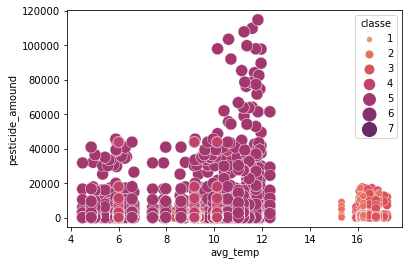

In [44]:
data=data[(data["Area"]=="France")|(data["Area"]=="Germany")|(merged['Area']=='Austria')|(merged['Area']=='Portugal')]
sns.scatterplot(
    data=data, x="avg_temp", y="pesticide_amound", hue="classe", palette="flare", size="classe",
    sizes=(200, 20), legend="full"
)

In [53]:
df_europe_cereal=df_Europe[df_Europe["Item_x"]=="Cereals, primary"]
df_europe_cereal = df_europe_cereal.drop_duplicates(subset=['Area', 'Year'], keep='last')
df_Year = df_europe_cereal.pivot(index= "Year",columns= "Area",values= "yield_amound")
df_Year.head()

Area,Albania,Austria,Bulgaria,Denmark,Finland,France,Germany,Greece,Hungary,Ireland,Italy,Netherlands,Norway,Portugal,Romania,Spain,Sweden,Switzerland
Year,,,,,,,,,,,,,,,,,,
1990,897000.00,5289752.0,8125944.00,9606978.0,4296400.0,55110621.0,37579589.0,4463739.00,12561481.00,1965820.00,17410540.0,1388200.0,1567856.0,1427010.0,17173554.0,18761569.00,6379500.0,1268000.0
1991,446152.00,5044859.0,8983805.61,9231245.0,3429000.0,60262165.8,39267858.0,6182700.00,15832169.00,1968048.39,19219130.0,1339247.0,1482090.0,1789423.0,19306621.0,19472661.44,5160200.0,1273639.0
1992,428918.16,4322590.0,6593632.81,6954231.0,2602500.0,60473754.7,34758462.0,5035400.00,10011896.00,2025770.80,19890867.0,1349658.0,1010010.0,1387311.0,12288452.0,14495661.07,3759700.0,1182772.0
1993,665720.00,4206456.0,5697849.17,8198500.0,3340300.0,55422571.9,35547425.0,4859715.35,8548410.00,1633158.66,19771428.0,1466100.0,1383645.0,1478937.0,15493054.0,17495716.71,5241500.0,1252968.0
1994,646026.00,4435935.0,6441668.21,7800025.0,3399600.0,53185122.0,36328713.0,5268468.30,11748979.46,1618110.58,19186472.0,1354800.0,1091070.0,1630319.0,18183777.0,15249059.34,4471600.0,1213740.0


<AxesSubplot:xlabel='Year'>

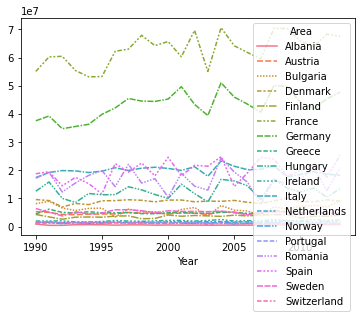

In [54]:
sns.lineplot(data=df_Year)